In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from cassandrautils import *

## WEATHER FORECAST

In [55]:
weatherDF = getDF(WEATHER_TABLE)
weatherDF['forecast_timestamp'] = weatherDF['forecastdate'] + pd.Timedelta(hours=7)
weatherDF = weatherDF.sort_values('forecastdate')
K_TO_C = -273.15 

print(f'Start time: {weatherDF.iloc[0]["forecast_timestamp"]}')
print(f'End time: {weatherDF.iloc[-1]["forecast_timestamp"]}')

weatherDF.head(5)

Start time: 2024-11-27 08:38:10
End time: 2024-11-27 14:05:35


,location,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind,forecast_timestamp
922,Melbourne,2024-11-27 01:38:10,clear sky,290.839996,91.0,1019.0,1732622005,1732660008,290.660004,292.579987,289.279999,0.00,2024-11-27 08:38:10
0,Ho Chi Minh,2024-11-27 01:38:21,clear sky,302.359985,69.0,1011.0,1732661663,1732703277,300.410004,300.410004,299.160004,3.09,2024-11-27 08:38:21
923,Melbourne,2024-11-27 01:38:31,clear sky,290.839996,91.0,1019.0,1732622005,1732660008,290.660004,292.579987,289.279999,0.00,2024-11-27 08:38:31
1,Ho Chi Minh,2024-11-27 01:38:42,clear sky,302.359985,69.0,1011.0,1732661663,1732703277,300.410004,300.410004,299.160004,3.09,2024-11-27 08:38:42
924,Melbourne,2024-11-27 01:38:52,clear sky,290.839996,91.0,1019.0,1732622005,1732660008,290.660004,292.579987,289.279999,0.00,2024-11-27 08:38:52


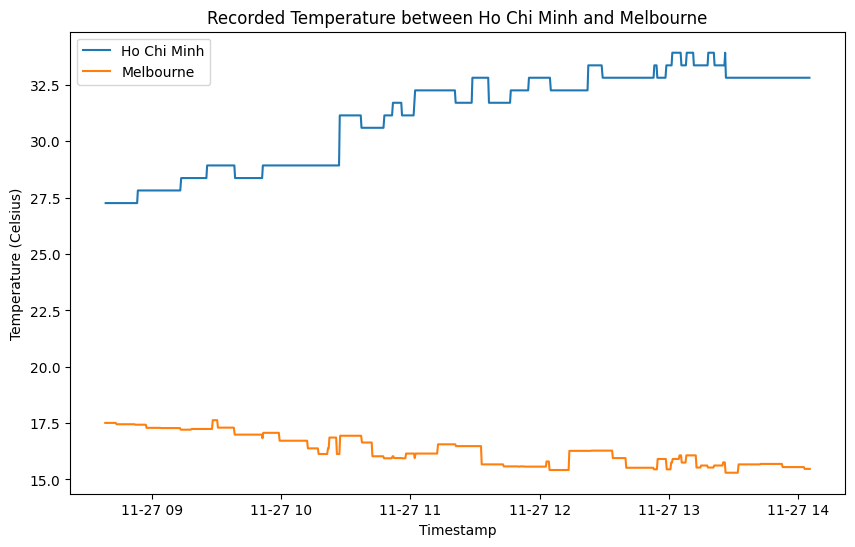

In [129]:
loc_1 = 'Ho Chi Minh'
loc_2 = 'Melbourne'
col_x = 'temp'
col_y = 'forecast_timestamp'

df_1 = weatherDF[weatherDF['location'] == loc_1].copy()
df_2 = weatherDF[weatherDF['location'] == loc_2].copy()
df_2[col_x] = df_2[col_x] + K_TO_C
df_1[col_x] = df_1[col_x] + K_TO_C

plt.figure(figsize=(10,6))
plt.xlabel("Timestamp")
plt.ylabel("Temperature (Celsius)")
plt.title(f'Recorded Temperature between {loc_1} and {loc_2}')

plt.plot(df_1[col_y], df_1[col_1],label=loc_1)
plt.plot(df_2[col_y], df_2[col_x],label=loc_2)

plt.legend()
plt.show()

**Analysis**

The chart displays the recorded temperature in Celsius for Ho Chi Minh and Melbourne. Ho Chi Minh shows a clear upward trend, starting around 27°C and gradually rising to approximately 32.5°C, indicating a warming trend throughout the day. In contrast, Melbourne maintains a significantly lower and more stable temperature, fluctuating between 15°C and 17.5°C with minimal variation. This highlights a stark temperature difference between the two cities, with Ho Chi Minh experiencing consistently warmer conditions.

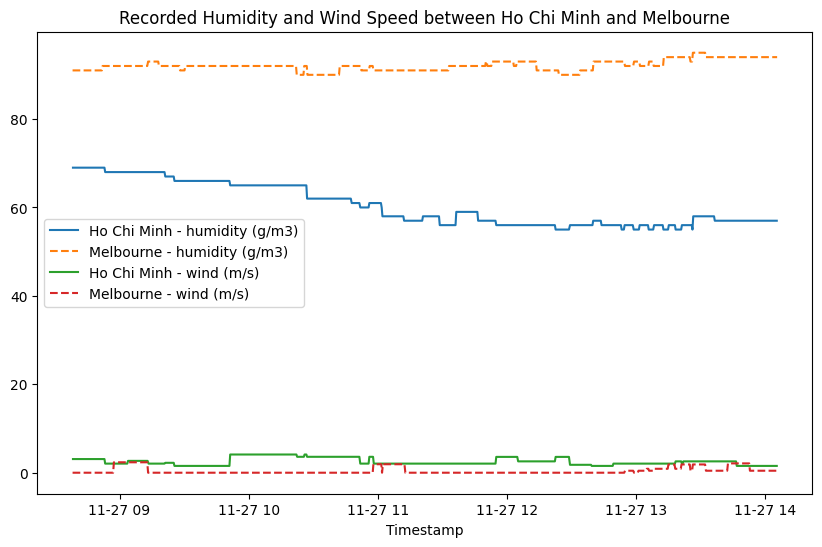

In [130]:
loc_1 = 'Ho Chi Minh'
loc_2 = 'Melbourne'
col_x = 'forecast_timestamp'
col_y = 'humidity'
col_y2 = 'wind'

df_1 = weatherDF[weatherDF['location'] == loc_1].copy()
df_2 = weatherDF[weatherDF['location'] == loc_2].copy()

plt.figure(figsize=(10,6))
plt.xlabel("Timestamp")
plt.title(f'Recorded Humidity and Wind Speed between {loc_1} and {loc_2}')

plt.plot(df_1[col_x], df_1[col_y],label=f'{loc_1} - {col_y} (g/m3)')
plt.plot(df_2[col_x], df_2[col_y],'--',label=f'{loc_2} - {col_y} (g/m3)')

plt.plot(df_1[col_x], df_1[col_y2],label=f'{loc_1} - {col_y2} (m/s)')
plt.plot(df_2[col_x], df_2[col_y2],'--',label=f'{loc_2} - {col_y2} (m/s)')

plt.legend()
plt.show()

**Analysis**

The plot compares humidity and wind speed between Ho Chi Minh and Melbourne. It shows that Melbourne consistently experiences higher humidity, remaining around 90 g/m³ with little variation, while Ho Chi Minh's humidity starts near 60 g/m³ and gradually decreases. In terms of wind speed, both cities exhibit calm conditions with minor fluctuations, remaining around 0 to 2 m/s throughout the period. The low wind speed in both locations suggests stable atmospheric conditions, possibly influenced by local weather patterns or high-pressure systems. The contrast in humidity levels might be attributed to geographical and seasonal differences, affecting the overall climate in each city.

## FAKER API VISUALIZATION

Since the data is randomly generated, only charts are provided in this section for statistical purpose than for analysis.

In [86]:
fakerDF = getDF(FAKER_TABLE)

fakerDF.head(5)

,name,address,country,created_at,dob,email,fav_color,locale,phone,year
0,Melanie Smith,"4780 Finley Club Suite 365\nRichardmouth, MD 7...",Botswana,1986-01-20,1935-12-01,quinnnancy@example.com,#0195a5,ff_SN,001-845-366-9488x99325,1992
1,Cindy Fisher,05058 Kimberly Junctions Suite 664\nJoneshaven...,Western Sahara,1977-07-05,2000-08-18,cody06@example.com,#76e091,shs_CA,5354233971,1973
2,Norman Roberts,USCGC Guerra\nFPO AE 65198,Reunion,1989-12-26,1975-02-26,davidrandall@example.net,#c8cc00,fil_PH,(657)913-7189,1996
3,Shawn Cross,36261 Garcia Trafficway Suite 392\nWarrenchest...,Lebanon,2004-03-05,2000-01-06,debbie44@example.net,#ed12c8,wo_SN,+1-598-871-7946,1997
4,Richard Johnson,"426 Justin Fort Apt. 218\nNew Williamside, AK ...",Bosnia and Herzegovina,2003-11-06,1979-02-02,stephanie24@example.net,#432da3,et_EE,2889665594,2024


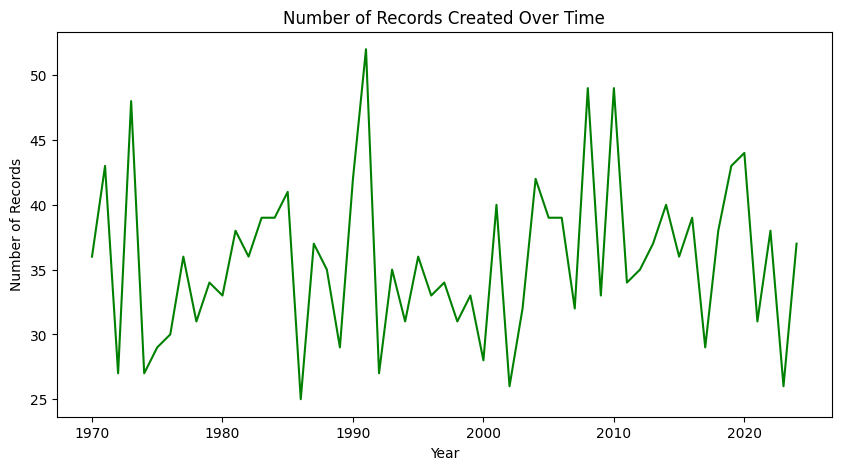

In [108]:
# Number of Records Created Over Time

# Extract counts
table_1 = fakerDF.copy()
table_1['created_year'] = table_1['created_at'].map(lambda x : x.date().year)
created_counts = table_1['created_year'].value_counts().sort_index()

# Plot counts
created_counts.plot(kind='line', color='green', figsize=(10, 5))
plt.title('Number of Records Created Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.show()

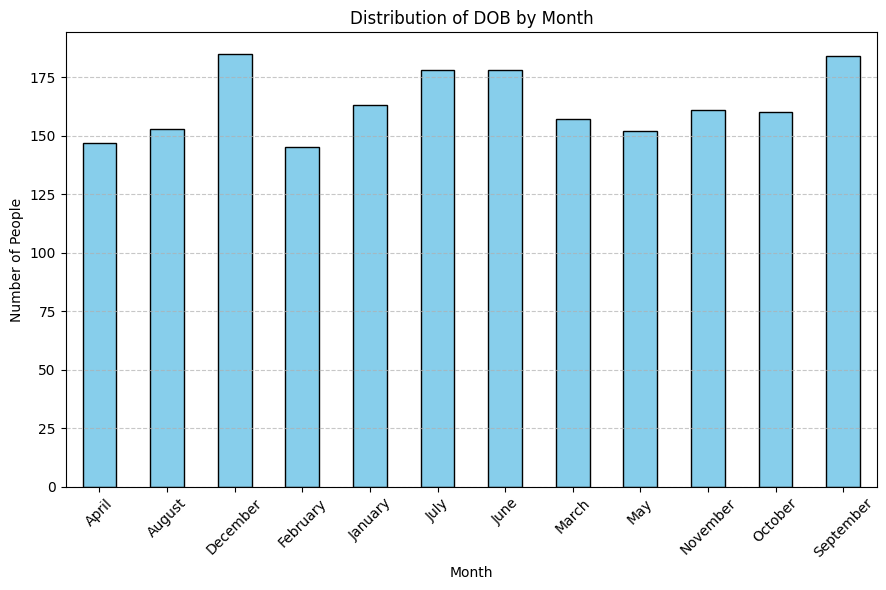

In [131]:
# Convert 'dob' to datetime format
table_2 = fakerDF.copy()
table_2['dob'] = table_2['dob'].apply(lambda x: x.date())
table_2['dob_month'] = pd.to_datetime(table_2['dob']).dt.month_name()

# Count the occurrences of each month
month_counts = table_2['dob_month'].value_counts().sort_index()

# Plot the distribution of birth months
plt.figure(figsize=(9, 6))
month_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of DOB by Month')
plt.xlabel('Month')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## CRYPTOCURRENCY VISUALIZATION

In [105]:
# fetch data + sort by time + adjust to VN local time
customDF = getDF(CUSTOM_TABLE)
customDF = customDF.sort_values('time')
customDF['time'] = customDF['time'] + pd.Timedelta(hours=7)

print(f'Start time: {customDF.iloc[0]["time"]}')
print(f'End time: {customDF.iloc[-1]["time"]}')

customDF.head(5)

Start time: 2024-11-27 08:38:21
End time: 2024-11-27 14:05:33


,time,ask,bid,last,symbols
960,2024-11-27 08:38:21,92520.523438,92520.507812,92520.507812,"[BTC, USD]"
583,2024-11-27 08:38:32,3336.479980,3336.209961,3334.239990,"[ETH, USD]"
938,2024-11-27 08:38:44,92489.046875,92489.039062,92494.976562,"[BTC, USD]"
1109,2024-11-27 08:38:59,3335.260010,3335.110107,3334.239990,"[ETH, USD]"
707,2024-11-27 08:39:14,92539.773438,92537.101562,92521.312500,"[BTC, USD]"


/tmp/ipykernel_10/2351151318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['spread'] = df['ask'] - df['bid']
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


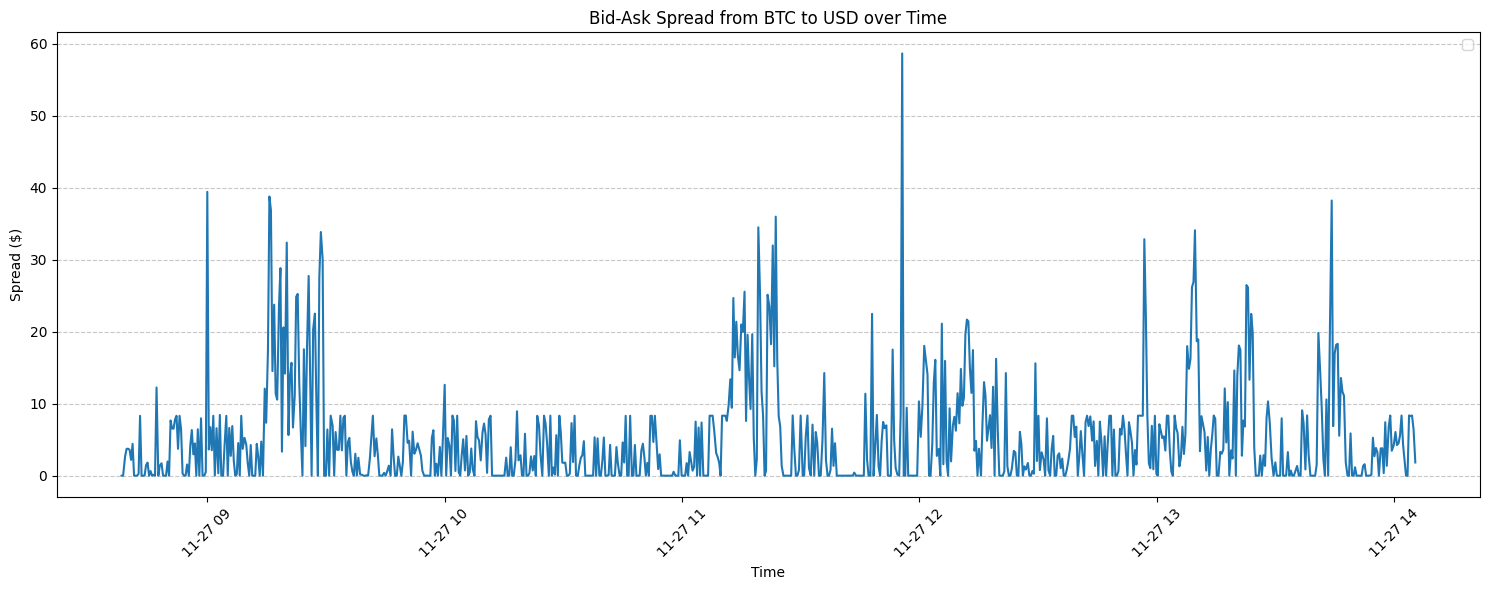

In [125]:
df = customDF[customDF['symbols'].map(lambda x : x[0] == 'BTC')]

df['spread'] = df['ask'] - df['bid']

# Plot bid-ask spread over time
plt.figure(figsize=(15, 6))
plt.plot(df['time'], df['spread'])
plt.title('Bid-Ask Spread from BTC to USD over Time')
plt.xlabel('Time')
plt.ylabel('Spread ($)')

plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Analysis**

The chart shows the bid-ask spread from Bitcoin (BTC) to US Dollars (USD). The bid-ask spread is the difference between the highest price a buyer is willing to pay (the bid) and the lowest price a seller is willing to accept (the ask). The chart displays significant volatility, with large spikes and drops occurring frequently. The spread ranges from around 0 to over 50 dollars at various points throughout the time period shown. This indicates that the Bitcoin market has experienced periods of high uncertainty and illiquidity, where the gap between buyer and seller prices has been quite wide.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


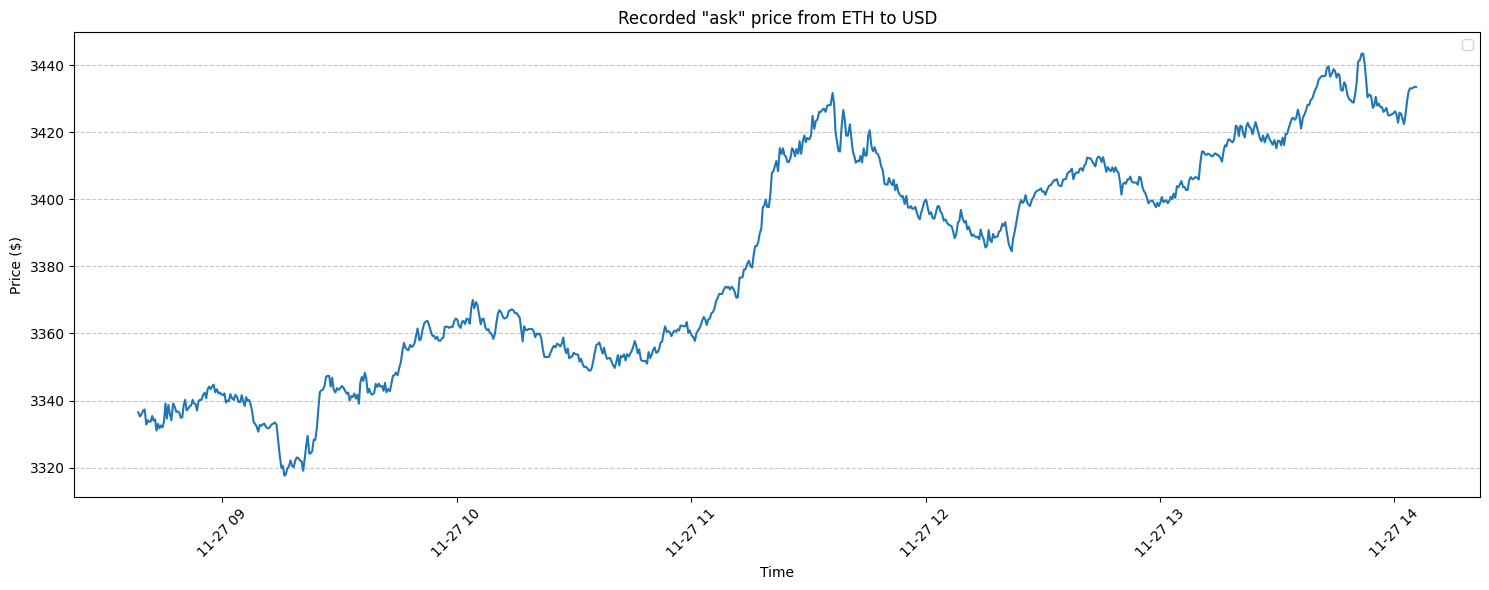

In [127]:
table2 = customDF[customDF['symbols'].map(lambda x : x[0] == 'ETH')]

plt.figure(figsize=(15,6))
plt.plot(table2['time'], table2['ask'])
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.title(f'Recorded "ask" price from ETH to USD')

plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Analysis**

The chart shows the recorded "ask" price from Ethereum (ETH) to US Dollars (USD) over time. The price starts around $3320 on November 21, 2009, and fluctuates significantly over the time period shown, reaching a high of around $3440 and a low of around $3290. The overall trend appears to be upward, with the price generally increasing over the 5-year period from 2009 to 2014. However, there are clear periods of volatility, with the price rising and falling sharply at various points. This reflects the inherent volatility of the cryptocurrency market, where prices can change rapidly based on a variety of factors such as market sentiment, news events, and trading activity.